[Tutorial Followed](https://www.youtube.com/watch?v=iyfk62n7Lz8&t=0s")

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

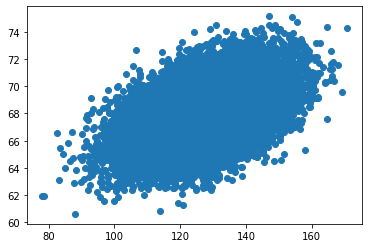

In [2]:

df = pd.read_csv("datasets/tut/train.csv")
x = df["weight"]
y = df["height"]

plt.scatter(x, y)

### From scratch method of finding linear regression

In [3]:
# Y = height, X = weight

## SSxx i.e. sum of squared difference between all Xactual and X mean
xmean = x.mean()
df["diffx"] = xmean - x 
df["diffx_squared"] = df["diffx"]**2
SSxx = df["diffx_squared"].sum()

## SSxy i.e. sum of x difference * sum of y difference
ymean = y.mean();
df["diffy"] = ymean - y
df["diff_xy"] = df["diffy"] * df["diffx"]
SSxy = df["diff_xy"].sum()

m = SSxy/SSxx

# Find teh intercept of regression line
b = ymean - m*xmean

In [6]:
m

0.08186549625414623

In [7]:
b

57.590342511632706

In [4]:
# weight is in pounds
def predict_height(weight):
    return m*weight+b;

predict_height(200)

73.96344176246195

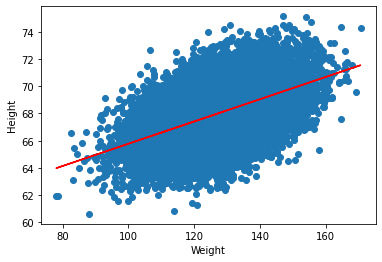

In [5]:
plt.scatter(x,y)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.plot(x,m*x+b, "r", )

### Linear regression using sklearn

In [8]:
from sklearn import linear_model

In [19]:
model = linear_model.LinearRegression()
# x = df["weight"] # Returns a series
x = df[["weight"]] # Returns a dataframe
x
print(type(x))
model.fit(x, y)

<class 'pandas.core.frame.DataFrame'>


LinearRegression()

In [20]:
model.coef_

array([0.0818655])

In [21]:
model.intercept_

57.590342511633395

In [23]:
model.predict([[150]])

/root/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.87016695])

In [25]:
model.score(x,y) # Returns the r^2 = 1 - SSE/SST
#SSE = sum of squared residuals (Error function we wanted to minimise)
#SST = sum of squared

0.2525847126739085